In [1]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Ma'lumotni yuklab olish
df = pd.read_csv("/kaggle/input/kun-uz-yangiliklar/final_kun_uz_dataset.csv", index_col=0)
df.head()

,title,content,target
0,"Eng kuchli Android-smartfonlar, uchar mehmonxo...",Eng kuchli Android-smartfonlarAvgust oyining e...,fan va texnika
1,"Apple taqdimoti: Yangi qurilmalar, o‘zgarishla...",7 sentabr kuni Apple kompaniyasi iPhone 14 lin...,fan va texnika
2,Eng kuchli Android-smartfonlar reytingi e’lon ...,Birinchi o‘rinni Asus ROG Phone 6 smartfoni eg...,fan va texnika
3,Sun’iy intellekt va xavfsizlik. Robotlar odaml...,Globallashgan dunyoda rivojlanishning asosiy o...,fan va texnika
4,Apple iPhone 14 va iPhone 14 Plus smartfonlari...,Apple kompaniyasi iPhone 14 va iPhone 14 Plus ...,fan va texnika


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 172349 entries, 0 to 172348
Data columns (total 3 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   title    172349 non-null  object
 1   content  172349 non-null  object
 2   target   172349 non-null  object
dtypes: object(3)
memory usage: 5.3+ MB


In [4]:
df2=pd.read_csv('/kaggle/input/daryouz-1/daryo_data.csv')

df2.head()

,title,content,target
0,Bayden Putinning “o‘ta og‘ir ahvolda” ekanligi...,"AQSH prezidenti Jo Bayden 19-oktabr, chorshanb...",dunyo
1,Germaniya prezidenti xavfsizlik nuqtayi nazari...,Germaniya prezidenti Frank-Valter Shtaynmayer ...,dunyo
2,Erdo‘g‘on Zelenskiyga “har qanday sharoitda ha...,Turkiya prezidenti Rajab Toyyib Erdo‘g‘on Ukra...,dunyo
3,"Isroil Ukrainaga qurol bermaydi, ammo raketa h...","Isroil mudofaa vaziri Benni Gants 19-oktabr, c...",dunyo
4,"BMW AQSHda elektromobil ishlab chiqarishga 1,7...","Bugun, 19-oktabr kuni Germaniyaning BMW avtomo...",dunyo


In [5]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175217 entries, 0 to 175216
Data columns (total 3 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   title    175217 non-null  object
 1   content  174621 non-null  object
 2   target   175217 non-null  object
dtypes: object(3)
memory usage: 4.0+ MB


In [6]:
df2=df2.dropna(axis=0)

In [7]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174621 entries, 0 to 175216
Data columns (total 3 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   title    174621 non-null  object
 1   content  174621 non-null  object
 2   target   174621 non-null  object
dtypes: object(3)
memory usage: 5.3+ MB


In [8]:
df["target"].value_counts()

o'zbekiston       66020
jahon             41240
jamiyat           39850
fan va texnika    10564
iqtisodiyot        7887
sport              6726
beznis               62
Name: target, dtype: int64

In [9]:
df['target'] = df['target'].replace("beznis" , "biznes")
df['target'].value_counts()

o'zbekiston       66020
jahon             41240
jamiyat           39850
fan va texnika    10564
iqtisodiyot        7887
sport              6726
biznes               62
Name: target, dtype: int64

In [10]:
df2['target'].value_counts()

mahalliy      72784
dunyo         47327
layfstayl     21125
sport         19695
madaniyat      9319
multimedia     2206
pul            2165
Name: target, dtype: int64

In [11]:
# Ustunlar nomini o'zgartirish
df2['target'] = df2['target'].replace({'mahalliy': "o'zbekiston", 'dunyo': 'jahon', 'pul': 'biznes'})
df2['target'].value_counts()

o'zbekiston    72784
jahon          47327
layfstayl      21125
sport          19695
madaniyat       9319
multimedia      2206
biznes          2165
Name: target, dtype: int64

In [12]:
data=pd.concat([df,df2])
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 346970 entries, 0 to 175216
Data columns (total 3 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   title    346970 non-null  object
 1   content  346970 non-null  object
 2   target   346970 non-null  object
dtypes: object(3)
memory usage: 10.6+ MB


In [13]:
data = data.drop('title', axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 346970 entries, 0 to 175216
Data columns (total 2 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   content  346970 non-null  object
 1   target   346970 non-null  object
dtypes: object(2)
memory usage: 7.9+ MB


In [14]:
data.value_counts('target')

target
o'zbekiston       138804
jahon              88567
jamiyat            39850
sport              26421
layfstayl          21125
fan va texnika     10564
madaniyat           9319
iqtisodiyot         7887
biznes              2227
multimedia          2206
dtype: int64

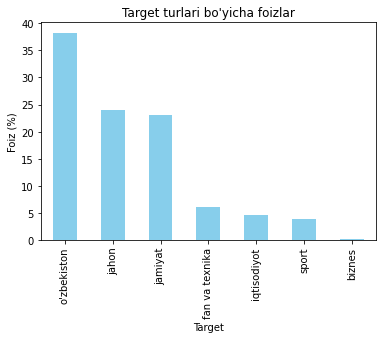

In [15]:
# Ustundagi qiymatlar necha foiz ekanligini hisoblaymiz
foizlar = df['target'].value_counts(normalize=True) * 100

# Diagramma chizamiz
foizlar.plot(kind='bar', color='skyblue')

# Diagrammaga sarlavha va o'q nomlari qo'shamiz
plt.title("Target turlari bo'yicha foizlar")
plt.xlabel("Target")
plt.ylabel("Foiz (%)")

# Diagrammani ko'rsatamiz
plt.show()

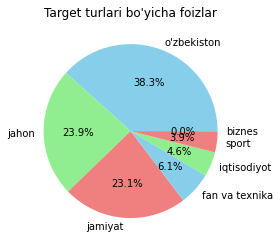

In [16]:
#  diagrammasi
foizlar.plot(kind='pie', autopct='%1.1f%%', colors=['skyblue', 'lightgreen', 'lightcoral'])

# Diagrammaga sarlavha qo'shamiz
plt.title("Target turlari bo'yicha foizlar")

# Diagrammani ko'rsatamiz
plt.ylabel('')  # Ortiqcha yozuvni olib tashlaymiz
plt.show()


In [17]:
# Ustunlar nomini o'zgartirish
data['target'] = data['target'].replace({'multimedia': "Jahon va fan texnika", 'jahon': "Jahon va fan texnika", 'fan va texnika': 'Jahon va fan texnika', 'jamiyat': 'Jamiyat, iqtisodiyot va sport', 'madaniyat': 'Jamiyat, iqtisodiyot va sport', 'layfstayl': 'Jamiyat, iqtisodiyot va sport', 'iqtisodiyot': 'Jamiyat, iqtisodiyot va sport', 'sport': 'Jamiyat, iqtisodiyot va sport', 'biznes': 'Jamiyat, iqtisodiyot va sport'})
data['target'].value_counts()

o'zbekiston                      138804
Jamiyat, iqtisodiyot va sport    106829
Jahon va fan texnika             101337
Name: target, dtype: int64

In [18]:

# "O'zbekiston" qiymatiga ega bo'lgan qatorlarni topamiz
ozbekiston_qatorlar = data[data['target'] == "o'zbekiston"]
# "O'zbekiston" qiymatiga ega bo'lgan qatorlarning 16% ini tanlaymiz

# "O'zbekiston" qiymatiga ega bo'lgan qatorlarning 16% ini tanlaymiz
tanlash_soni = int(len(ozbekiston_qatorlar) * 0.16)
tanlangan_qatorlar = ozbekiston_qatorlar.sample(n=tanlash_soni, random_state=42)

# Tanlangan qatorlarni olib tashlaymiz
data = data.drop(tanlangan_qatorlar.index)


data['target'].value_counts()

Jamiyat, iqtisodiyot va sport    102442
o'zbekiston                      101647
Jahon va fan texnika             101337
Name: target, dtype: int64

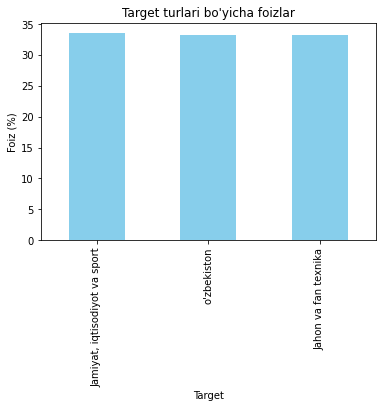

In [19]:
# Ustundagi qiymatlar necha foiz ekanligini hisoblaymiz
foizlar = data['target'].value_counts(normalize=True) * 100

# Diagramma chizamiz
foizlar.plot(kind='bar', color='skyblue')

# Diagrammaga sarlavha va o'q nomlari qo'shamiz
plt.title("Target turlari bo'yicha foizlar")
plt.xlabel("Target")
plt.ylabel("Foiz (%)")

# Diagrammani ko'rsatamiz
plt.show()

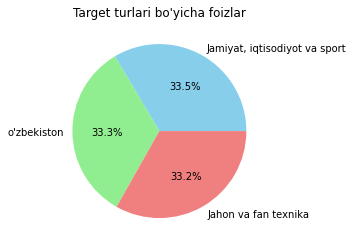

In [20]:
#  diagrammasi
foizlar.plot(kind='pie', autopct='%1.1f%%', colors=['skyblue', 'lightgreen', 'lightcoral'])

# Diagrammaga sarlavha qo'shamiz
plt.title("Target turlari bo'yicha foizlar")

# Diagrammani ko'rsatamiz
plt.ylabel('')  # Ortiqcha yozuvni olib tashlaymiz
plt.show()


In [21]:
pip install gradio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.0/20.0 MB 33.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.4/75.4 kB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 288.3/288.3 kB 20.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 21.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... - done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.5/74.5 kB 4.2 MB/s eta 0:00:00
  Created wheel for ffmpy: filename=ffmpy-0.3.2-py3-none-any.whl size=5600 sha256=68576274b71ccabf1fe203ca1590544d480db5cc5949f15eeda705f7a7202986
  Stored in directory: /root/.cache/pip/wheels/81/c3/08/a4932aee56b934891932e4a1b189604f27d3d4e92b2ecd5ed4
Successfully built ffmpy
  Attempting uninstall: huggingface-hub
    Found existing installation: huggingface-hub 0.8.1
    Uninstalling huggingface-hub-0.8.1:
      Successfully uninstalled huggingface-hub-0.8.1
ERROR: pip's dependency resolver does not currently take into account all the package

In [22]:
import re
data['content'] = data['content'].apply(lambda x: x.lower())
data['content'] = data['content'].apply((lambda x: re.sub(r'[^a-zA-z0-9\s]', '', x)))

In [23]:
from sklearn.feature_extraction.text import CountVectorizer
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM, SpatialDropout1D

In [24]:
max_fatures = 1000
tokenizer = Tokenizer(num_words=max_fatures, split=' ')
tokenizer.fit_on_texts(data['content'].values)
X = tokenizer.texts_to_sequences(data['content'].values)

X = pad_sequences(X)
X

array([[  0,   0,   0, ...,  17, 674, 981],
       [  0,   0,   0, ...,   5, 550,  67],
       [  0,   0,   0, ..., 280,  27, 299],
       ...,
       [  0,   0,   0, ...,  26,   5, 365],
       [  0,   0,   0, ...,  63,  65, 426],
       [  0,   0,   0, ...,  13, 368, 688]], dtype=int32)

In [25]:
X.shape

(305426, 4576)

In [26]:
import tensorflow as tf

X_input = tf.keras.layers.Input(shape=(32,32,3))

X = tf.keras.layers.Conv2D(4, 3, activation='relu')(X_input)
X = tf.keras.layers.MaxPool2D(2,2)(X)
X = tf.keras.layers.Conv2D(16, 3, activation='relu')(X)
X = tf.keras.layers.MaxPool2D(2,2)(X)
X = tf.keras.layers.Conv2D(8, 3, activation='relu')(X)
X = tf.keras.layers.MaxPool2D(2,2)(X)

X = tf.keras.layers.Flatten()(X)
X = tf.keras.layers.Dense(10, activation='relu')(X)
X = tf.keras.layers.Dense(2, activation='softmax')(X)

model = tf.keras.models.Model(inputs=X_input, outputs=X)

model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 30, 30, 4)         112       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 4)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 16)        592       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 16)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 8)           1160      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 2, 2, 8)           0     

Cloning into 'Neural-Plot'...
remote: Enumerating objects: 160, done.
remote: Counting objects: 100% (160/160), done.
remote: Compressing objects: 100% (136/136), done.
remote: Total 160 (delta 52), reused 102 (delta 19), pack-reused 0 (from 0)
Receiving objects: 100% (160/160), 16.86 MiB | 32.89 MiB/s, done.
Resolving deltas: 100% (52/52), done.


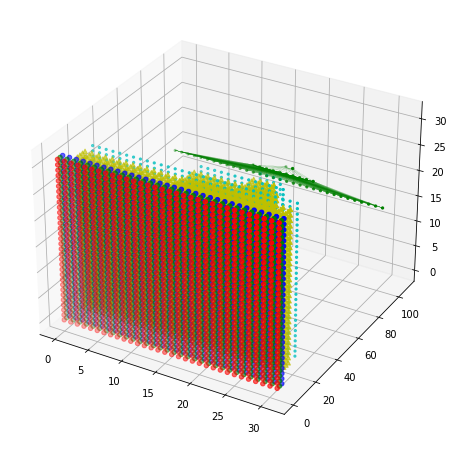

In [27]:
!git clone https://github.com/Rajsoni03/Neural-Plot.git  # clone from github
!cp ./Neural-Plot/neuralplot.py ./   # copy module to current directory
from neuralplot import neuralplot
%matplotlib inline 
neuralplot(model=model, grid=True, connection=True, linewidth=0.1)

In [28]:
max_fatures = 1000
embed_dim = 128
lstm_out = 196

input_length = X.shape[1]

model = Sequential()
model.add(Embedding(input_dim=max_fatures, output_dim=embed_dim, input_length=input_length))
model.add(SpatialDropout1D(0.4))
model.add(LSTM(lstm_out, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(3, activation='softmax'))

model.build(input_shape=(None, input_length))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 2, 128)            128000    
_________________________________________________________________
spatial_dropout1d (SpatialDr (None, 2, 128)            0         
_________________________________________________________________
lstm (LSTM)                  (None, 196)               254800    
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 591       
Total params: 383,391
Trainable params: 383,391
Non-trainable params: 0
_________________________________________________________________
None


fatal: destination path 'Neural-Plot' already exists and is not an empty directory.


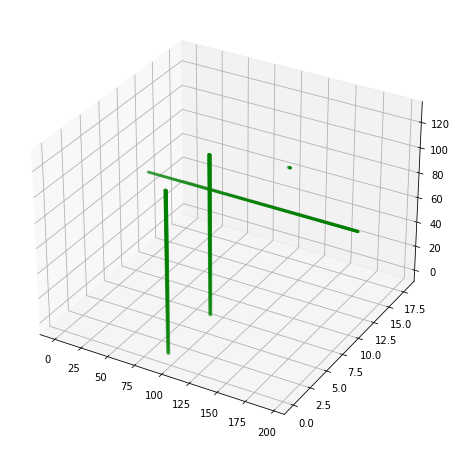

In [29]:
!git clone https://github.com/Rajsoni03/Neural-Plot.git  # clone from github
!cp ./Neural-Plot/neuralplot.py ./   # copy module to current directory
from neuralplot import neuralplot
%matplotlib inline 

neuralplot(model=model, grid=True, connection=True, linewidth=0.1)

In [30]:
Y = pd.get_dummies(data['target'])
Y

,Jahon va fan texnika,"Jamiyat, iqtisodiyot va sport",o'zbekiston
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
175212,0,1,0
175213,0,1,0
175214,0,1,0
175215,0,1,0


In [31]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=42)
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

TypeError: Expected sequence or array-like, got <class 'keras.engine.keras_tensor.KerasTensor'>

In [ ]:
model.fit(X_train, Y_train, epochs=15, batch_size=64, verbose=3)

In [ ]:
score, acc = model.evaluate(X_test, Y_test, verbose=2, batch_size=64)
print("aniqligi: ", acc)

In [ ]:
model.save('classer.h5')

In [ ]:
import gradio as gr
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import load_model

# Load your pre-trained model and tokenizer
# Example: loaded_model = load_model('path_to_your_model.h5')
# Example: tokenizer = Tokenizer()
# Make sure you load the actual model and tokenizer you have

# Define the categories
categories = ["o'zbekiston", "jahon", "jamiyat", "sport", "layfstayl", "fan va texnika", "madaniyat", "iqtisodiyot", "biznes", "multimedia"]

def classify_text(txt, model, tokenizer):
    try:
        # Tokenize and pad the input text
        txt_seq = tokenizer.texts_to_sequences([txt])
        txt_padded = pad_sequences(txt_seq, maxlen=100)  # Adjust maxlen as needed

        # Predict the category probabilities
        prediction = model.predict(txt_padded)[0]  # Get the first prediction (since model.predict returns a batch)

        # Get the index of the highest probability
        predicted_class = np.argmax(prediction)

        # Map the predicted index to the category
        predicted_category = categories[predicted_class]

        # Get the confidence score (the probability of the predicted category)
        confidence_score = prediction[predicted_class]

        # Return additional information
        return predicted_category, confidence_score, {category: prob for category, prob in zip(categories, prediction)}

    except Exception as e:
        return "Ошибка", 0.0, {"Error": str(e)}

# Define the Gradio interface
def gradio_interface(txt):
    # Ensure the model and tokenizer are properly initialized
    return classify_text(txt, model=loaded_model, tokenizer=tokenizer)

# Create Gradio interface with input textbox and output in dictionary format
iface = gr.Interface(
    fn=gradio_interface,
    inputs="text",
    outputs="json",
    title="Text Classification",
    description="Matnni siyosat, texnologiya, oʻyin-kulgi va biznes kabi toifalarga ajrating."
)

# Launch the Gradio app
iface.launch()